<a href="https://colab.research.google.com/github/NneamakaKateOkafor/hello-world/blob/master/Twitter_US_Airline_Sentiment_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Twitter US Airline Sentiment Project

**Data Description:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").
bold text

**1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)**


In [203]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [204]:
!pip install contractions

In [262]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re, string, unicodedata
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import contractions
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important;} </style>"))
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [206]:
from google.colab import drive

In [207]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [208]:
# Define the pathway to the folder where the csv file is stored
project_path = '/content/drive/My Drive/Colab Notebooks/'

dataset_file = project_path + 'Tweets.csv'

In [209]:
# Read the csv file
mydata = pd.read_csv(dataset_file)

In [210]:
# Basic Information of the dataset including data types
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [211]:
# Check only the data types not the whole information
mydata.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [212]:
# Analysis of the body of distributions / head
mydata.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [213]:
# Display the shape of the data
mydata.shape

(14640, 15)

In [214]:
# Describe the attributes of this dataset (name, range of values observed, mean and median, standard deviation and quartiles)
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [215]:
# Number of unique values in each column
mydata.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [216]:
# Check for duplicate rows
mydata.duplicated().sum()

36

In [217]:
# To remove duplicates, we can use the following code, but i will not remove them since all sentiments in this project are required.
# mydata = mydata.drop_duplicates()

In [218]:
# Skewness of the dataset
mydata.skew()

tweet_id                        -0.475122
airline_sentiment_confidence    -1.239343
negativereason_confidence       -0.601117
retweet_count                   33.912872
dtype: float64

In [219]:
# Null values
mydata.isnull().sum(axis=0)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

**2. Understand of data-columns: (5 Marks)**

a. Drop all other columns except “text” and “airline_sentiment”


In [220]:
# Create a copy of mydata
mydata2 = mydata.copy()
mydata2.drop(['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence',
              'airline','airline_sentiment_gold','name',
              'negativereason_gold','retweet_count','tweet_coord','tweet_created',
              'tweet_location','user_timezone'], axis=1, inplace=True)

mydata2

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
...,...,...
14635,positive,@AmericanAir thank you we got on a different flight to Chicago.
14636,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637,neutral,@AmericanAir Please bring American Airlines to #BlackBerry10
14638,negative,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"


b. Check the shape of data

In [221]:
# Display the shape of the data after dropping the columns
mydata2.shape

(14640, 2)

**Note: The columns reduced from 15 to 2**


c. Print first 5 rows of data

In [222]:
# Display full dataframe information (Non-truncated Text column)
pd.set_option('display.max_colwidth', None)
mydata2.head

<bound method NDFrame.head of       airline_sentiment                                                                                                                                                    text
0               neutral                                                                                                                     @VirginAmerica What @dhepburn said.
1              positive                                                                                @VirginAmerica plus you've added commercials to the experience... tacky.
2               neutral                                                                                 @VirginAmerica I didn't today... Must mean I need to take another trip!
3              negative                          @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
4              negative                                                                   

**3. Text pre-processing: Data preparation. (20 Marks)**

a. Html tag removal.

b. Tokenization.

c. Remove the numbers.

d. Removal of Special Characters and Punctuations.

e. Conversion to lowercase.

f. Lemmatize or stemming.

g. Join the words in the list to convert back to text string in the dataframe. (So that each row
contains the data in text format.)

h. Print first 5 rows of data after pre-processing.


In [223]:
# HTML tag removal
def remove_html_tags(text):
  soup = BeautifulSoup(text, 'html.parser')
  return soup.get_text()

mydata2['text'] = mydata2['text'].apply(lambda x: remove_html_tags(x))

In [224]:
mydata2

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
...,...,...
14635,positive,@AmericanAir thank you we got on a different flight to Chicago.
14636,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637,neutral,@AmericanAir Please bring American Airlines to #BlackBerry10
14638,negative,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"


In [225]:
# Remove the numbers
def remove_numbers(text):
  text = re.sub(r'\d+', '', str(text))
  return text


mydata2['text'] = mydata2['text'].apply(lambda x: remove_numbers(x))

In [226]:
mydata2.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [227]:
# Removal of Special Characters and Punctuations
def remove_punts_characters(text):
  new_text = []
  clean_txt = re.sub(r'[#,@,&,?,!]', '', text)
  clean_txt = contractions.fix(clean_txt)
  #new_txt = re.sub(r'[^\w\s]', ',', clean_txt)
  #if new_txt != '':
    #new_text.append(new_txt)
  
  return clean_txt

mydata2['text'] = mydata2['text'].apply(lambda x: remove_punts_characters(x))

In [228]:
mydata2

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said.
1,positive,VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,VirginAmerica I did not today... Must mean I need to take another trip
3,negative,"VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces they have little recourse"
4,negative,VirginAmerica and it is a really big bad thing about it
...,...,...
14635,positive,AmericanAir thank you we got on a different flight to Chicago.
14636,negative,AmericanAir leaving over minutes Late Flight. No warnings or communication until we were minutes Late Flight. that is called shitty customer svc
14637,neutral,AmericanAir Please bring American Airlines to BlackBerry
14638,negative,AmericanAir you have my money you change my flight and do not answer your phones Any other suggestions so I can make my commitment


In [229]:
# Tokenization
mydata2['text'] = mydata2.apply(lambda x: nltk.word_tokenize(x['text']), axis=1)

In [230]:
mydata2

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said, .]"
1,positive,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip]"
3,negative,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, they, have, little, recourse]"
4,negative,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"
...,...,...
14635,positive,"[AmericanAir, thank, you, we, got, on, a, different, flight, to, Chicago, .]"
14636,negative,"[AmericanAir, leaving, over, minutes, Late, Flight, ., No, warnings, or, communication, until, we, were, minutes, Late, Flight, ., that, is, called, shitty, customer, svc]"
14637,neutral,"[AmericanAir, Please, bring, American, Airlines, to, BlackBerry]"
14638,negative,"[AmericanAir, you, have, my, money, you, change, my, flight, and, do, not, answer, your, phones, Any, other, suggestions, so, I, can, make, my, commitment]"


In [231]:
stopwords = stopwords.words('english')

In [232]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [233]:
# Conversion to lowercase
def to_lowercase(text):
  new_text = []
  for txt in text:
    new_txt = txt.lower()
    new_text.append(new_txt)
  return new_text

In [234]:
# Remove non-ASCII
def remove_non_ascii(text):
  """Remove non-ASCII characters from list of tokenized words"""
  new_text = []
  for txt in text:
    new_txt = unicodedata.normalize('NFKD',txt).encode('ascii', 'ignore').decode('utf-8','ignore')
    new_text.append(new_txt)
  return new_text

In [235]:
# Remove Punctuation
def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    new_text = []
    for txt in text:
        new_txt = re.sub(r'[^\w\s]', '', text)
        if new_txt != '':
            new_text.append(new_txt)
    return new_text

In [236]:
# Remove Stopwords
def remove_stopwords(text):
    """Remove stop words from list of tokenized words"""
    new_text = []
    for txt in text:
        if txt not in stopwords:
          new_text.append(txt)
    return new_text

In [237]:
# Lemmatize or stemming
def lemmatize_list(text):
   lemmatizer = WordNetLemmatizer()
   new_text = []
   for txt in text:
     new_text.append(lemmatizer.lemmatize(txt))
   return new_text

def stemming_list(text):
   new_text = []
   for txt in text:
     new_text.append(LancasterStemmer.stem(txt))

   return new_text 


In [238]:
# Join the words in the list to convert back to text string in the dataframe
def normalize(text):
  text = remove_non_ascii(text)
  text = to_lowercase(text)
 # text = remove_punctuation(text)
  text = remove_stopwords(text)
  text = lemmatize_list(text)
  return '.'.join(text)

mydata2['text'] = mydata2.apply(lambda x: normalize(x['text']), axis=1)
mydata2

,airline_sentiment,text
0,neutral,virginamerica.dhepburn.said..
1,positive,virginamerica.plus.added.commercial.experience.....tacky..
2,neutral,virginamerica.today.....must.mean.need.take.another.trip
3,negative,virginamerica.really.aggressive.blast.obnoxious.``.entertainment.''.guest.'.face.little.recourse
4,negative,virginamerica.really.big.bad.thing
...,...,...
14635,positive,americanair.thank.got.different.flight.chicago..
14636,negative,americanair.leaving.minute.late.flight...warning.communication.minute.late.flight...called.shitty.customer.svc
14637,neutral,americanair.please.bring.american.airline.blackberry
14638,negative,americanair.money.change.flight.answer.phone.suggestion.make.commitment


In [239]:
# Print first 5 rows of data after pre-processing
mydata2.head()

,airline_sentiment,text
0,neutral,virginamerica.dhepburn.said..
1,positive,virginamerica.plus.added.commercial.experience.....tacky..
2,neutral,virginamerica.today.....must.mean.need.take.another.trip
3,negative,virginamerica.really.aggressive.blast.obnoxious.``.entertainment.''.guest.'.face.little.recourse
4,negative,virginamerica.really.big.bad.thing


**4. Vectorization: (10 Marks)**

a. Use CountVectorizer.

b. Use TfidfVectorizer.

In [240]:
# Use Count Vectorizer
count_vectorizer = CountVectorizer(max_features=1000)
count_vect_data_features = count_vectorizer.fit_transform(mydata2['text'])
count_vect_data_features = count_vect_data_features.toarray() 
count_vect_data_features.shape

(14640, 1000)

In [241]:
# Use Tfidf Vectorizer
tfidf_vectoriser = TfidfVectorizer(max_features=2000)
tfidf_data_features = tfidf_vectoriser.fit_transform(mydata2['text'])
tfidf_data_features = tfidf_data_features.toarray()
tfidf_data_features.shape

(14640, 2000)

**5. Fit and evaluate model using both type of vectorization. (6+6 Marks)**

In [242]:
labels = mydata2['airline_sentiment'].apply(lambda x:0 if x=='negative' else 1 )
labels.dtype

dtype('int64')

In [243]:
 Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier()]
   

In [244]:
# Fit and Evaluate Model using Count Vectorizer
Accuracy=[]
Model=[]
features=[]

def model_fit(Xtrain,ytrain,xtest,ytest,feature_type):
 

  #Accuracy=[]
  #Model=[]
  for clf in Classifiers:

    try:
      fit = clf.fit(Xtrain,ytrain)
      pred = fit.predict(xtest)
    except Exception:
      fit = clf.fit(Xtrain,ytrain)
      pred = fit.predict(xtest)
    accuracy = accuracy_score(pred,ytest)
    Accuracy.append(accuracy)
    Model.append(clf.__class__.__name__)
    features.append(feature_type)
    print('Accuracy of '+clf.__class__.__name__+' is '+str(accuracy)+ ':' + feature_type) 
    print(classification_report(pred,ytest))
    
    #Confusion Matrix
    #cm = confusion_matrix(pred,ytest)
    #plt.figure()
    #plot_confusion_matrix(cm,cmap=plt.cm.Blues)
   
    #plot_confusion_matrix((clf,pred, ytest)
    #plt.xticks(range(2), ['Negative', 'Positive'],color='black')
    #plt.yticks(range(2), ['Negative', 'Positive'])
    #plt.xlabel('Predicted Label')
    #plt.ylabel('True Label')
    #plt.show()


In [245]:
X_train, X_test, y_train, y_test = train_test_split(count_vect_data_features,labels, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(10248, 1000)
(4392, 1000)
(10248,)
(4392,)


In [246]:
model_fit(X_train,y_train,X_test,y_test,'CountVectorizer')


Accuracy of LogisticRegression is 0.6407103825136612:CountVectorizer
              precision    recall  f1-score   support

           0       1.00      0.64      0.78      4392
           1       0.00      0.00      0.00         0

    accuracy                           0.64      4392
   macro avg       0.50      0.32      0.39      4392
weighted avg       1.00      0.64      0.78      4392

Accuracy of DecisionTreeClassifier is 0.7461293260473588:CountVectorizer
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2787
           1       0.66      0.64      0.65      1605

    accuracy                           0.75      4392
   macro avg       0.73      0.72      0.73      4392
weighted avg       0.75      0.75      0.75      4392

Accuracy of RandomForestClassifier is 0.7948542805100182:CountVectorizer
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2861
           1       0.7

In [247]:
# Fit and Evaluate Model using Tfidf Vectorizer
X_train, X_test, y_train, y_test = train_test_split(tfidf_data_features,labels, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10248, 2000)
(4392, 2000)
(10248,)
(4392,)


In [248]:
model_fit(X_train,y_train,X_test,y_test,'TfidfVectorizer');

Accuracy of LogisticRegression is 0.6407103825136612:TfidfVectorizer
              precision    recall  f1-score   support

           0       1.00      0.64      0.78      4392
           1       0.00      0.00      0.00         0

    accuracy                           0.64      4392
   macro avg       0.50      0.32      0.39      4392
weighted avg       1.00      0.64      0.78      4392

Accuracy of DecisionTreeClassifier is 0.7317850637522769:TfidfVectorizer
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2770
           1       0.64      0.62      0.63      1622

    accuracy                           0.73      4392
   macro avg       0.71      0.71      0.71      4392
weighted avg       0.73      0.73      0.73      4392

Accuracy of RandomForestClassifier is 0.8126138433515483:TfidfVectorizer
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      3069
           1       0.6

In [249]:
myresult = pd.DataFrame({'Model': Model, 'Accuracy': Accuracy, 'Vectorizer': features})
myresult = myresult[['Model', 'Accuracy', 'Vectorizer']]

In [250]:
myresult

,Model,Accuracy,Vectorizer
0,LogisticRegression,0.640710,CountVectorizer
1,DecisionTreeClassifier,0.746129,CountVectorizer
2,RandomForestClassifier,0.794854,CountVectorizer
3,AdaBoostClassifier,0.778689,CountVectorizer
4,LogisticRegression,0.640710,TfidfVectorizer
5,DecisionTreeClassifier,0.731785,TfidfVectorizer
6,RandomForestClassifier,0.812614,TfidfVectorizer
7,AdaBoostClassifier,0.777322,TfidfVectorizer


The RandomForestClassifier has the highest accuracy and F1 scores

In [251]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_data_features,labels, test_size=0.3, random_state=42)
X_train.shape
y_train.shape

(10248,)

In [252]:
forest = RandomForestClassifier(n_estimators=200, n_jobs=4)
forest = forest.fit(X_train,y_train)

In [253]:
results = forest.predict(X_test)
accuracy = accuracy_score(results,y_test)
print(accuracy)
#print(np.mean(cross_val_score(forest, tfidf_data_features, cv=10)))

0.8110200364298725


[[2537  277]
 [ 553 1025]]


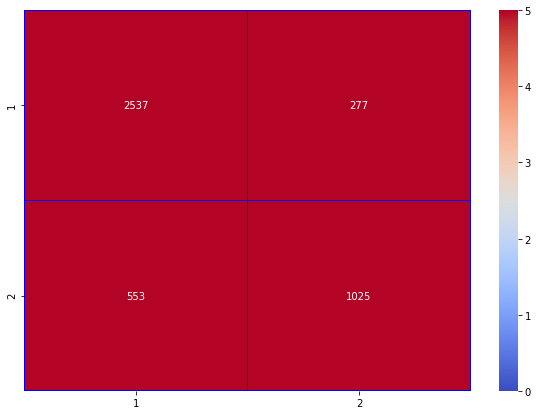

In [260]:
conf_mat = confusion_matrix(y_test, results)
print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12"],
                  columns = [i for i in "12"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt = '.0f', linewidths=.5, cmap = 'coolwarm', vmin = 0, vmax = 5, linecolor = "bb")

**6. Summarize your understanding of the application of Various Pre-processing and Vectorization and
performance of your model on this dataset. (8 Marks)**

The dataset reviews were converted to integers (0,1)

I pre-processed the text column by doing the following:
*   All HTML tags were removed using BeautifulSoup package because the data was acquired from the web
*   The numbers and special characters were removed and replaced with spaces with the help of regular expression 
*   The contraction package converted words, reduced and/or combined them by dropping the apostrophe to the their full words
*   **Single words were Tokenized after the removal of special characters and punctuations (instead of before) to avoid ending up with gibberish (combination of syllables with no meaning) after joining the words and converting back to text string in the dataframe**
*   Stopwords from the tokenized text were removed and subsequently, converted to lowercase
*   The tokenized words were Lemmatized
 
Because models can only be run on integers, the words were converted words to numbers to feed the model.

CountVectorizer and TfidfVectorizer were deployed into this model.

This model was built and evaluated using the following:  
*   LogisticRegression
*   DecisionTreeClassifier
*   RandomForestClassifier
*   AdaBoostClassifier

After building the classification model, the model predicted the result for the test data.

The RadomForestClassifier produced the highest accuracy of approximately 81% using the TfidfVectorizer. 

To increase the accuracy of this model, i tuned the hyperparameters of the RandomForest Classifier model and increased the number of features from 1000 to 2000.
